# **Data Cleaning and Visual Exploratory Data Analysis of insurance-cost.csv**

## 2440023002 - Andreas Christianto - COMP6640001 - LA08 – LEC

## 1. Data Cleaning & Visual Explanatory Data Analysis

## a) Import Data (Variables)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
import math

from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/AndreChristianto/UTS-ML/main/insurance-cost.csv'
insurance = pd.read_csv(url)

Melihat data yang diimport

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Melihat variabel apa yang mempunyai nilai null

In [ ]:
insurance.isnull().any()

age         False
sex         False
bmi          True
children    False
smoker       True
region      False
charges     False
dtype: bool

## b) Replace Missing Value

Menggantikan value null menjadi mean (cotinuous, bmi) dan modus (categorical, smoker) berdasarkan 'sex' (male / female)

In [ ]:
bmi_means = insurance.groupby(['sex'])['bmi'].mean()
mean_female = bmi_means[0]
mean_male = bmi_means[1]
smoker_mode = insurance.groupby(['sex'])['smoker'].agg(pd.Series.mode)
smoker_female = smoker_mode[0]
smoker_male = smoker_mode[1]
print("mean bmi untuk female      : ", mean_female)
print("mean bmi untuk male        : ", mean_male)
print("modus smoker untuk female  : ", smoker_female)
print("modus smoker untuk male    : ", smoker_male)

mean bmi untuk female      :  30.372829046898637
mean bmi untuk male        :  30.936229629629633
modus smoker untuk female  :  no
modus smoker untuk male    :  no


In [ ]:
new_insurance = insurance

new_insurance.loc[(new_insurance['sex'] == "female") & (new_insurance['bmi'].isnull()), 'bmi'] = mean_female
new_insurance.loc[(new_insurance['sex'] == "male") & (new_insurance['bmi'].isnull()), 'bmi'] = mean_male

new_insurance.loc[(new_insurance['sex'] == "female") & (new_insurance['smoker'].isnull()), 'smoker'] = smoker_female
new_insurance.loc[(new_insurance['sex'] == "male") & (new_insurance['smoker'].isnull()), 'smoker'] = smoker_male

new_insurance.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

## c) Data Visualisation

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


<Figure size 1800x216 with 0 Axes>

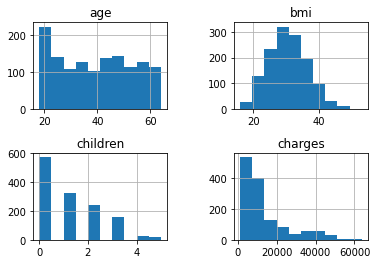

In [ ]:
print(new_insurance.head)

plt.figure(figsize=(25, 3))

new_insurance.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16, 9]
plt.show()

Text(0.5, 1.0, 'Box Plot of charges')

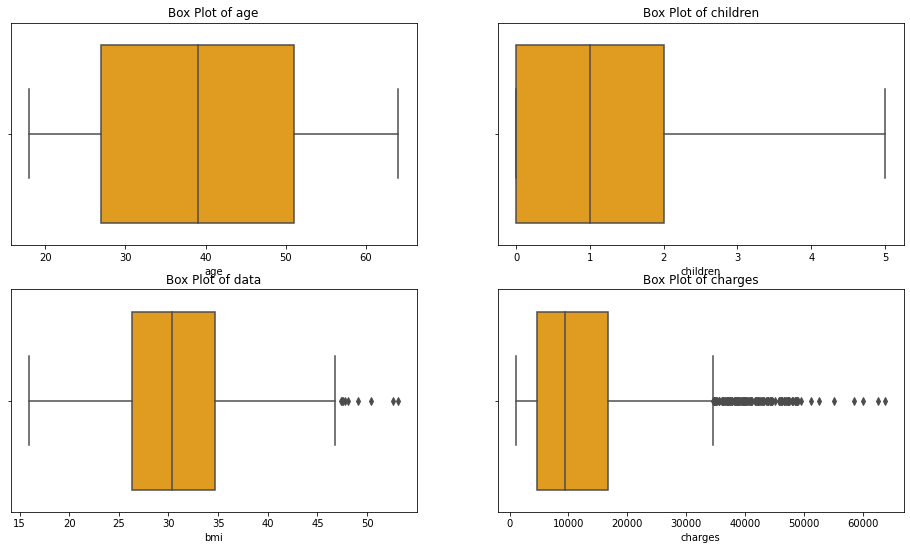

In [ ]:
plt.subplot(221)
sns.boxplot(x = "age", data = new_insurance, color='orange')
plt.title(f"Box Plot of age")

plt.subplot(222)
sns.boxplot(x = "children", data = new_insurance, color='orange')
plt.title(f"Box Plot of children")

plt.subplot(223)
sns.boxplot(x = "bmi", data = new_insurance, color='orange')
plt.title(f"Box Plot of data")

plt.subplot(224)
sns.boxplot(x = "charges", data = new_insurance, color='orange')
plt.title(f"Box Plot of charges")

Text(0, 0.5, 'charges')

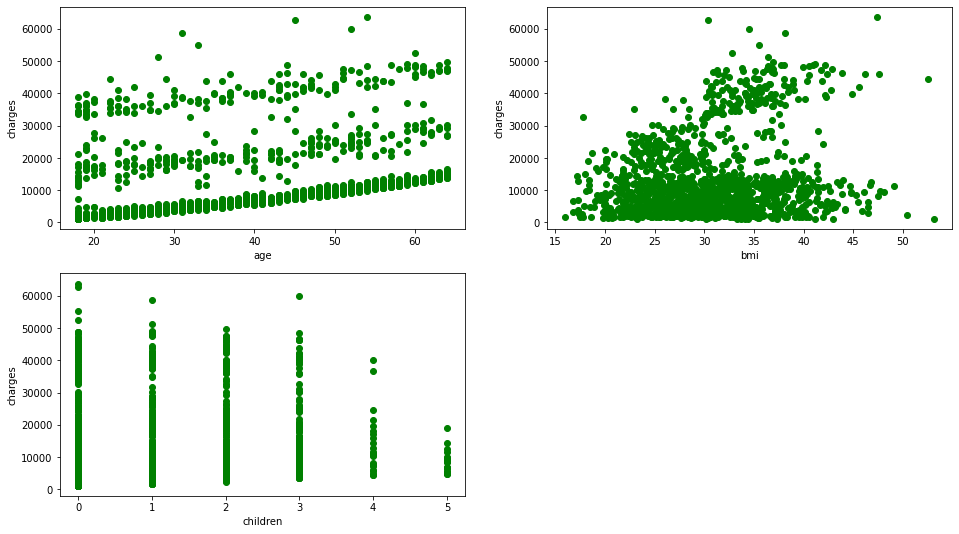

In [ ]:
plt.subplot(221)
plt.scatter(new_insurance["age"], new_insurance["charges"], color = "green")
plt.xlabel("age")
plt.ylabel("charges")

plt.subplot(222)
plt.scatter(new_insurance["bmi"], new_insurance["charges"], color = "green")
plt.xlabel("bmi")
plt.ylabel("charges")

plt.subplot(223)
plt.scatter(new_insurance["children"], new_insurance["charges"], color = "green")
plt.xlabel("children")
plt.ylabel("charges")

## ANOVA Test

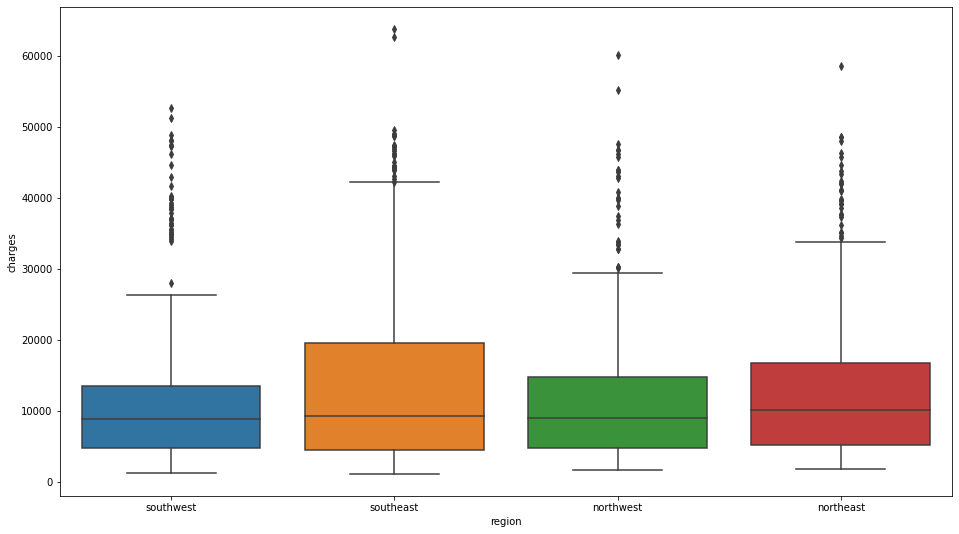

In [ ]:
sns.boxplot(x = 'region', y = 'charges', data = new_insurance)
plt.show()

In [ ]:
import scipy.stats as stats

charge_sw = new_insurance[new_insurance['region'] == 'southwest']['charges']
charge_se = new_insurance[new_insurance['region'] == 'southeast']['charges']
charge_nw = new_insurance[new_insurance['region'] == 'northwest']['charges']
charge_ne = new_insurance[new_insurance['region'] == 'northeast']['charges']

fvalue, pvalue = stats.f_oneway(charge_sw, charge_se, charge_nw, charge_ne)
print(fvalue, pvalue)

2.96962669358912 0.0308933560705201


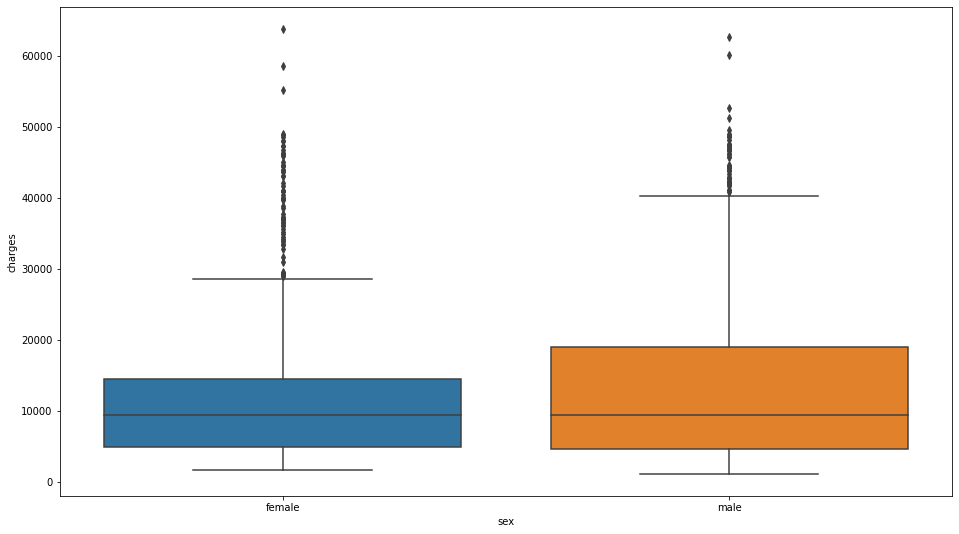

In [ ]:
sns.boxplot(x = 'sex', y = 'charges', data = new_insurance)
plt.show()

In [ ]:
import scipy.stats as stats

charge_fe = new_insurance[new_insurance['sex'] == 'female']['charges']
charge_ma = new_insurance[new_insurance['sex'] == 'male']['charges']

fvalue, pvalue = stats.f_oneway(charge_fe, charge_ma)
print(fvalue, pvalue)

4.3997016974374565 0.03613272100596256


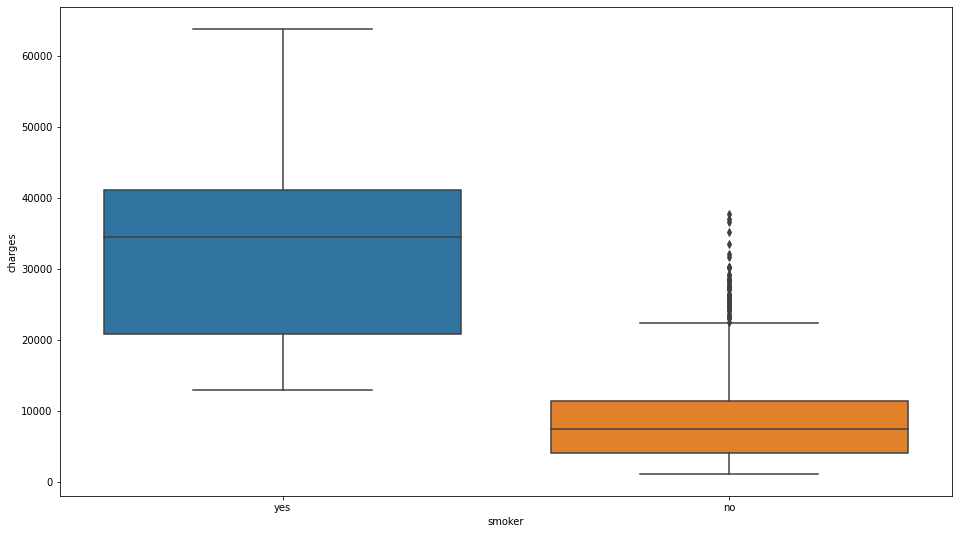

In [ ]:
sns.boxplot(x = 'smoker', y = 'charges', data = new_insurance)
plt.show()

In [ ]:
import scipy.stats as stats

charge_ye = new_insurance[new_insurance['smoker'] == 'yes']['charges']
charge_no = new_insurance[new_insurance['smoker'] == 'no']['charges']

fvalue, pvalue = stats.f_oneway(charge_ye, charge_no)
print(fvalue, pvalue)

2139.1296810976964 1.3007551169596065e-279


## d) Correlation

Text(0.5, 1.0, 'Correlation Matrix')

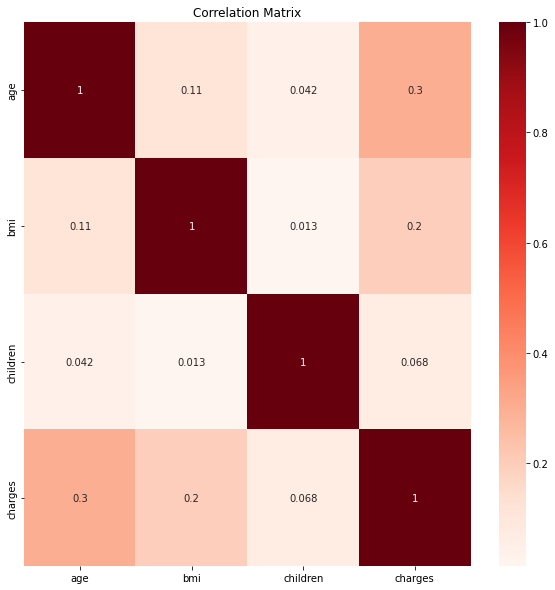

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(new_insurance.corr(), annot=True,cmap='Reds')
plt.title("Correlation Matrix")

Berdasarkan correlation matrix di atas, kita bisa mengetahui urutan hal yang paling berpengaruh ke yang paling tidak berpengaruh terhadap **charges**.

*   **age** sebesar 0.3
*   **children** sebesar 0.2
*   **bmi** sebesar 0.068

Ini berarti variabel / hal yang paling tinggi ada pada **age** dan **bmi**. Untuk variabel lain (**region**, **sex**, dan **smoker**), mereka tidak cukup mempengaruhi (berdasarkan fvalue yang tinggi dan pvalue yang rendah) **charges**.


# 2. Training & Test Set

In [ ]:
x = new_insurance.loc[:, new_insurance.columns != 'charges']
y = new_insurance['charges']

x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train

,age,sex,bmi,children,smoker,region
517,45,male,30.495,2,no,northwest
1091,55,female,29.830,0,no,northeast
601,51,male,31.635,0,no,northwest
1034,61,male,38.380,0,no,northwest
1176,52,female,24.130,1,yes,northwest
...,...,...,...,...,...,...
1028,54,male,31.600,0,no,southwest
992,50,female,31.600,2,no,southwest
258,51,male,24.415,4,no,northwest
506,22,male,31.350,1,no,northwest


In [ ]:
y_train

517      8413.46305
1091    11286.53870
601      9174.13565
1034    12950.07120
1176    23887.66270
           ...     
1028     9850.43200
992     10118.42400
258     11520.09985
506      2643.26850
317     10435.06525
Name: charges, Length: 1070, dtype: float64

In [ ]:
x_train_drop = x_train.drop(['sex', 'smoker', 'region', 'children'], axis = 1)
x_test_drop = x_test.drop(['sex', 'smoker', 'region', 'children'], axis = 1)

In [ ]:
x_train_drop

,age,bmi
517,45,30.495
1091,55,29.830
601,51,31.635
1034,61,38.380
1176,52,24.130
...,...,...
1028,54,31.600
992,50,31.600
258,51,24.415
506,22,31.350


In [ ]:
x_test_drop

,age,bmi
201,48,32.230
212,24,28.500
763,27,26.030
1148,55,21.500
1232,54,24.605
...,...,...
33,63,28.310
178,46,28.900
626,36,28.880
1244,18,33.330


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_transform = sc.fit_transform(x_train_drop)

In [ ]:
class gradient_descent:
  def __init__(self, nvar):
    self.intercept = 0
    self.theta = np.random.randn(nvar)

  def predict(self, X, theta, intercept):
    return np.array(intercept + np.dot(X, theta))

  def update_theta(self, X, y, y_pred, alpha):
    deriv_theta = (2/len(y)) * np.dot((y_pred - y), X)
    return self.theta - (alpha * deriv_theta)

  def update_intercept(self, y, y_pred, alpha):
    deriv_intercept = (2/len(y)) * np.sum(y_pred - y)
    return self.intercept - (alpha * deriv_intercept)

  def get_MSE(self, y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)

  def fit(self, X, y, epochs, alpha):
    loss = []
  
    for i in range(epochs):
      y_pred = self.predict(X, self.theta, self.intercept)
      self.theta = self.update_theta(X, y, y_pred, alpha)
      self.intercept = self.update_intercept(y, y_pred, alpha)
      loss.append(self.get_MSE(y, y_pred))

    return loss

In [ ]:
x_train_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 517 to 317
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1070 non-null   int64  
 1   bmi     1070 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 25.1 KB


In [ ]:
y_train.head()

517      8413.46305
1091    11286.53870
601      9174.13565
1034    12950.07120
1176    23887.66270
Name: charges, dtype: float64

In [ ]:
y_train.count()

1070

In [ ]:
all_loss = []
for alpha in[0.0005, 0.001, 0.005, 0.01]:
  model = gradient_descent(x_train_drop.shape[1])
  epochs = 5000
  loss = model.fit(x_transform, y_train, epochs, alpha)
  all_loss.append([alpha, loss])

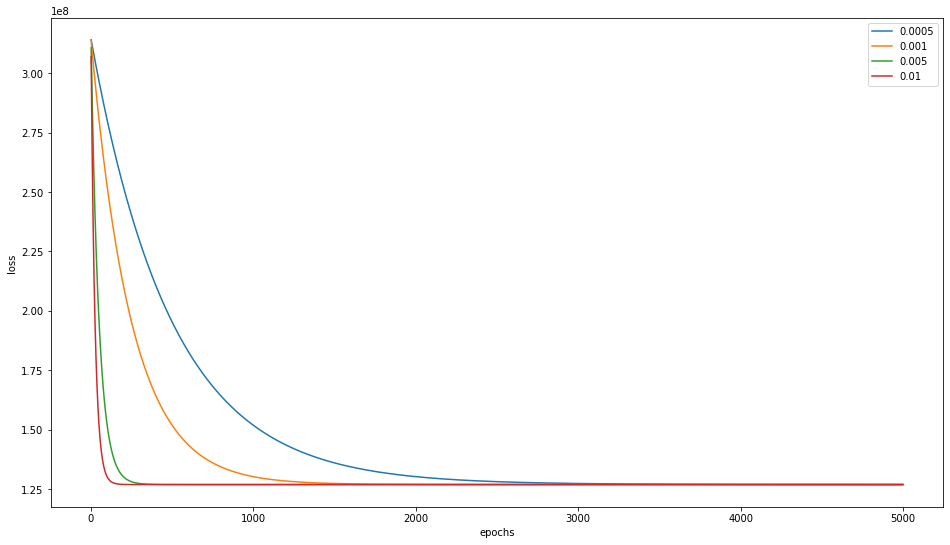

In [ ]:
for i in range(len(all_loss)):
  plt.plot(np.arange(1, epochs), all_loss[i][1][1:], label = all_loss[i][0])

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
model = gradient_descent(x_train_drop.shape[1])
epochs = 5000
_ = model.fit(x_transform, y_train, epochs, 0.01)

# 3. Linear Regression

## a) Prediksi dengan Test Set

In [ ]:
print(f'intercept : {model.intercept}')
print(f'theta     : {model.theta}')

intercept : 13079.15585520463
theta     : [3310.26519693 2039.63117301]


In [ ]:
w = model.theta
b = model.intercept

In [ ]:
def final_predict(x):
  return b + np.dot(x, w)

In [ ]:
y_pred = final_predict(sc.transform(x_test_drop))
compare = pd.DataFrame({
    'y_pred'  : y_pred,
    'y_true'  : y_test
})
compare.head()

,y_pred,y_true
201,15673.046284,8871.15170
212,8775.669614,3537.70300
763,8642.732783,3070.80870
1148,13679.633689,10791.96000
1232,14497.213514,12479.70895


## b) Tampilan hasil prediksi dengan Test Set dan nilai sebenarnya dari Test Set

In [ ]:
model = LinearRegression()
model.fit(x_train_drop, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test_drop)
print(y_test.head())

201      8871.15170
212      3537.70300
763      3070.80870
1148    10791.96000
1232    12479.70895
Name: charges, dtype: float64


In [ ]:
print(pd.Series(y_pred).head())

0    15673.046284
1     8775.669614
2     8642.732783
3    13679.633689
4    14497.213514
dtype: float64


# 4. Evaluasi

Coefficient

In [ ]:
print("Weights  :")
print("weight0  =", model.intercept_)
print("weight1  =", model.coef_[0])
print("weight2  =", model.coef_[1])

Weights  :
weight0  = -6516.37638114559
weight1  = 234.7192563914864
weight2  = 338.9046961966252


In [ ]:
model.score(x_test_drop, y_test)

0.11358707445212257

MAE

In [ ]:
mean_absolute_error(y_test, y_pred)

9191.978063264003

MSE

In [ ]:
mean_squared_error(y_test, y_pred)

140078854.34411183

RMSE

In [ ]:
mean_squared_error(y_test, y_pred, squared = False)

11835.491301340719

R square

In [ ]:
r2_score(y_test, y_pred)

0.11358707445212257

R square 0.11 (11%) berarti age dan bmi hanya mempengaruhi charges sebanyak 11% sedangkan sisanya (89%)

# 5. Predicted Value vs Measure / Actual Value

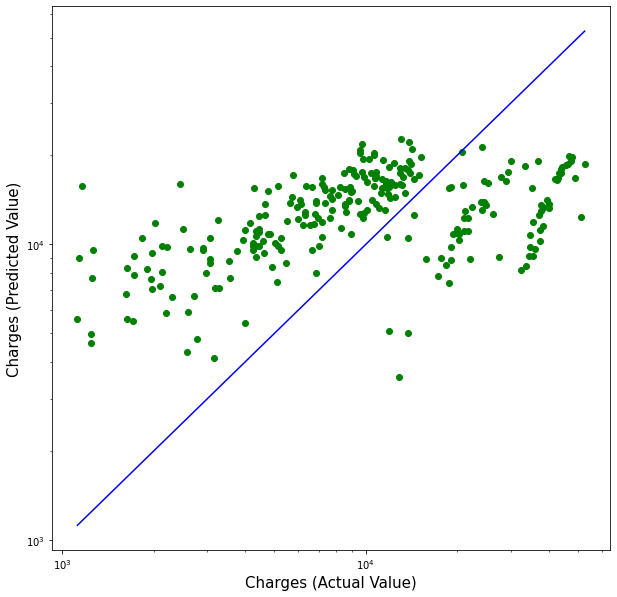

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, c='green')

plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Charges (Actual Value)', fontsize=15)
plt.ylabel('Charges (Predicted Value)', fontsize=15)
plt.show()

# Exit

In [ ]:
exit()